In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.fillna(data.mean(), inplace=True)
X = data.drop(["id", "stroke"], axis=1)
y = data["stroke"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

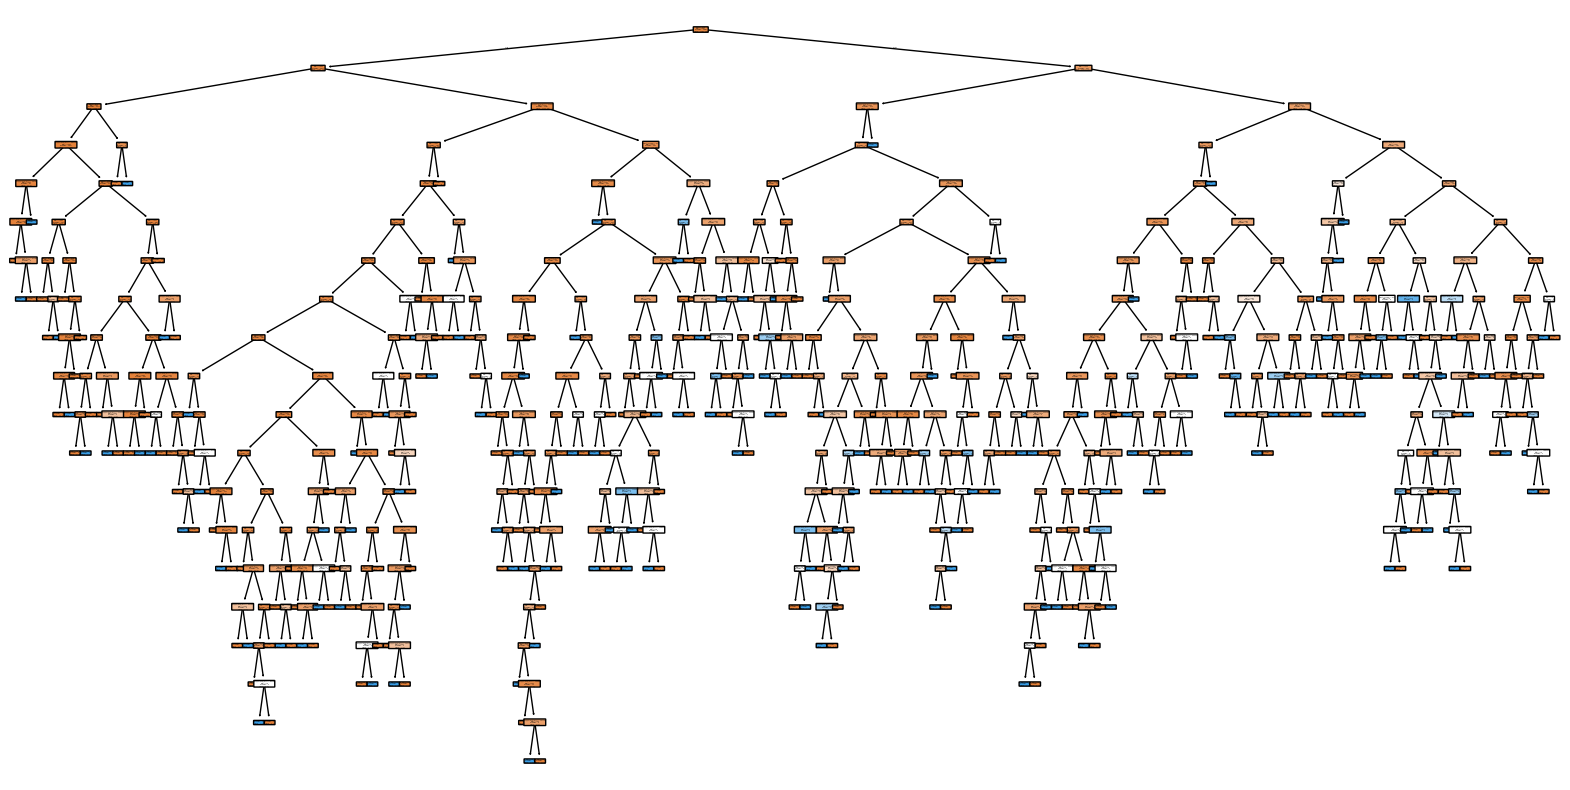

In [12]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, rounded=True, feature_names=X.columns)
plt.show()

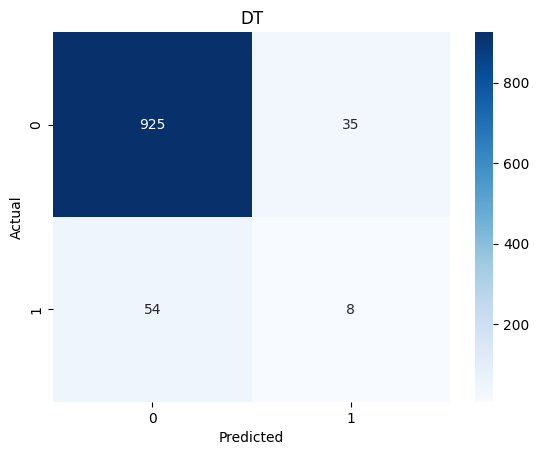

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.19      0.13      0.15        62

    accuracy                           0.91      1022
   macro avg       0.57      0.55      0.55      1022
weighted avg       0.90      0.91      0.91      1022

